<a href="https://colab.research.google.com/github/EstevahnAguilera/Data-Science-Projects/blob/main/SDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description
You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

## Description of the plans
**Note:** Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

- **Surf**

1. Monthly charge: $20
2. 500 monthly minutes, 50 texts, and 15 GB of data
3. After exceeding the package limits:
    - 1 minute: 3 cents
    - 1 text message: 3 cents
    - 1 GB of data: $10

- **Ultimate**

1. Monthly charge: $70
2. 3000 monthly minutes, 1000 text messages, and 30 GB of data
3. After exceeding the package limits:
      - 1 minute: 1 cent
      - 1 text message: 1 cent
      - 1 GB of data: $7

## Description of the data
Remember! Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

- The users table (data on users):
    - user_id — unique user identifier
    - first_name — user's name
    - last_name — user's last name
    - age — user's age (years)
    - reg_date — subscription date (dd, mm, yy)
    - churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)
    - city — user's city of residence
    - plan — calling plan name

- The calls table (data on calls):
    - id — unique call identifier
    - call_date — call date
    - duration — call duration (in minutes)
    - user_id — the identifier of the user making the call

- The messages table (data on texts):
    - id — unique text message identifier
    - message_date — text message date
    - user_id — the identifier of the user sending the text

- The internet table (data on web sessions):
    - id — unique session identifier
    - mb_used — the volume of data spent during the session (in megabytes)
    - session_date — web session date
    - user_id — user identifier

- The plans table (data on the plans):
    - plan_name — calling plan name
    - usd_monthly_fee — monthly charge in US dollars
    - minutes_included — monthly minute allowance
    - messages_included — monthly text allowance
    - mb_per_month_included — data volume allowance (in megabytes)
    - usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
    - usd_per_message — price per text after exceeding the package limits
    - usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

## Getting Started
I will begin by setting up the environment.
### Importing Libraries
I will import the necessary libraries.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
# Importing files from local computer
from google.colab import files
uploaded_1 = files.upload() # calls
uploaded_2 = files.upload() # messages
uploaded_3 = files.upload() # internet
uploaded_4 = files.upload() # users
uploaded_5 = files.upload() # plans

Saving megaline_calls(2).csv to megaline_calls(2).csv


Saving megaline_messages.csv to megaline_messages.csv


Saving megaline_internet.csv to megaline_internet.csv


Saving megaline_users.csv to megaline_users.csv


Saving megaline_plans(1).csv to megaline_plans(1).csv


In [5]:
# Loading the datasets
calls = pd.read_csv('megaline_calls(2).csv')
messages = pd.read_csv('megaline_messages.csv')
internet = pd.read_csv('megaline_internet.csv')
users = pd.read_csv('megaline_users.csv')
plans = pd.read_csv('megaline_plans(1).csv')

In [8]:
# Analyzing the data function which will be called in separate cells
def analyze_data(dataframe_name, data):
  print(f"Analyzing the {dataframe_name} DataFrame! \n")
  print(data.head(), '\n')
  print(data.info(), '\n')
  print(data.describe(), '\n')

### Plans DataFrame
- Analyzing the data
- Fixing the data
- Enriching the data

In [9]:
# Analyzing the data
analyze_data('plans', plans)

Analyzing the plans DataFrame! 

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute      

In the general information, I have noticed the following:
- The plans dataframe holds all of the included benefits based on the specific plan.
- I also noticed that some of the columns can be named differently.
- I also noticed that 'usd_per_gb' and 'usd_monthly_pay' is type int when it should be float.
- Lastly, I noticed that the dataframe didn't have an 'id' column which could be used when merging dataframes.

In [12]:
# Fixing the data
# Renaming columns
plans.rename(columns = {
    'usd_monthly_pay' : 'monthly_fee',
    'usd_per_gb' : 'price_per_gb',
    'usd_per_message' : 'price_per_message',
    'usd_per_minute' : 'price_per_minute'
}, inplace = True)

# Changing the type for "price_per_gb" aka "usd_per_gb"
plans['price_per_gb'] = plans['price_per_gb'].astype('float')

# Changing the type for "monthly_fee" aka "usd_monthly_pay"
plans['monthly_fee'] = plans['monthly_fee'].astype('float')

# Testing purposes (Checking if the names and data types were changed)
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   monthly_fee            2 non-null      float64
 4   price_per_gb           2 non-null      float64
 5   price_per_message      2 non-null      float64
 6   price_per_minute       2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 260.0+ bytes


In [13]:
# Enriching the data
# Adding a new column called id just incase if I need to merge dataframes
plans['plans_id'] = plans.index + 1

### Users DataFrame
- Analyzing the data
- Fixing the data
- Enriching the data

In [14]:
# Analyzing the data
analyze_data('users', users)

Analyzing the users DataFrame! 

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    objec

In the general information, I have noticed the following:
- The users dataframe holds all of the information regarding the user.
- I noticed that the 'first_name' and 'last_name' could be merged into one, but it's not necessary.
- I noticed that the 'reg_date' and 'churn_date' are of type object when they should be datetime.
- I noticed that the 'city' could be broken up by 'state' and 'metro_area'.
- Lastly, we could drop the 'city' column after we have broken it up, but I am not going to because I am unsure if I will need it in later cells.

In [16]:
# Fixing the data
# Change reg_date from object to datetime
users['reg_date'] = pd.to_datetime(users['reg_date'])

# Change churn_date from object to datetime
users['churn_date'] = pd.to_datetime(users['churn_date'])

# Testing (checking if the datatype has changed)
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


In [17]:
# Enriching the data
# Separating the state from the city
users['state'] = users['city'].str.extract(r',\s([A-Z]{2})\sMSA')

# Separating the metro_area from the city
users['metro_area'] = users['city'].str.replace(r',\s([A-Z]{2})\sMSA', '', regex = True)

# We could delete the city column now and just use the state and metro area
  #users.drop(columns = ['city'], inplace = True)

# Testing (Checking if the 'state' and 'metro_area' are now separate)
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,metro_area
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,GA,Atlanta-Sandy Springs-Roswell
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,WA,Seattle-Tacoma-Bellevue
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NV,Las Vegas-Henderson-Paradise
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,OK,Tulsa
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,WA,Seattle-Tacoma-Bellevue


### Calls DataFrame
- Analyzing the data
- Fixing the data
- Enriching the data

In [18]:
# Analyzing the data
analyze_data('calls', calls)

Analyzing the calls DataFrame! 

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None 

             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.6

In the general information, I have noticed the following:

- The calls dataframe holds the information regarding a specific call made by a specific user.
- I noticed that the 'call_date' is of type object when it should be datetime.
- I noticed that the 'duration' is of type float, but even if it is 0.01, it needs to be rounded to the next whole number.

In [19]:
# Fixing the data
# Changing the type of 'call_date' to datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Testing (checking if the data type changed)
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [20]:
# Enriching the data
# Translate float minutes to whole minutes
calls['minutes'] = np.ceil(calls['duration'])

calls['minutes'] = calls['minutes'].astype(int)

# Testing (Checking if it rounds to the next whole number)
calls.head()

,id,user_id,call_date,duration,minutes
0,1000_93,1000,2018-12-27,8.52,9
1,1000_145,1000,2018-12-27,13.66,14
2,1000_247,1000,2018-12-27,14.48,15
3,1000_309,1000,2018-12-28,5.76,6
4,1000_380,1000,2018-12-30,4.22,5


### Messages
- Analyzing the data
- Fixing the data

In [21]:
# Analyzing the data
analyze_data('messages', messages)

Analyzing the messages DataFrame! 

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None 

            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000 



In the general information, I notcied the following:
- The messages dataframe holds the text message id, users id and the date in which the message was sent.
- I noticed that the 'message_date' should be in the datetime format instead of object.

In [22]:
# Fixing the data
# Changing the type to datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Testing (Checking if the data type changed)
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Internet DataFrame
- Analyzing the data
- Fixing the data

In [23]:
# Analyzing the data
analyze_data('internet', internet)

Analyzing the internet DataFrame! 

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None 

             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      

In the general information, I noticed the following:
- The internet data frame holds the amount of megabytes used by a specific user based on a specific session.
- I noticed that the 'session_date' is of type object when it should be datetime.

In [24]:
# Fixing the data
# Changing the type to datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

# Testing (Checking if the data type changed)
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


## Aggregate data per user

In [25]:
# Calculating the number of called made by each user per month. Saving the result.
# First we want to extract the month from the 'call_date' column
calls['month'] = calls['call_date'].dt.to_period('M')

# Then we want to groupby 'user_id' and 'month' to only get the calls for that specific user
monthly_calls = calls.groupby(['user_id', 'month']).size().reset_index(name = 'calls_per_month')

# Testing
print(monthly_calls.head())

   user_id    month  calls_per_month
0     1000  2018-12               16
1     1001  2018-08               27
2     1001  2018-09               49
3     1001  2018-10               65
4     1001  2018-11               64


In [26]:
# Calculating the amount of minutes spent by each user per month. Saving the result.
# We already made a month column, which is what we will use in order to get the sum of the minutes per month
monthly_minutes = calls.groupby(['user_id', 'month'])['minutes'].sum().reset_index(name = 'minutes_per_month')

# Testing
monthly_minutes.head()

,user_id,month,minutes_per_month
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426


In [27]:
# Calculating the number of messages sent by each user per month. Saving the result.
# I would need to extract the month from the 'message_date' column
messages['month'] = messages['message_date'].dt.to_period('M')

# I would need to groupby 'user_id' and 'month', then get the size based on that specific user
monthly_messages = messages.groupby(['user_id', 'month']).size().reset_index(name = 'monthly_messages')

# Testing
monthly_messages.head()

,user_id,month,monthly_messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [28]:
# Calculating the volume of internet traffic used by each user per month. Saving the result.

# We would do the same for internet. Create a month column
internet['month'] = internet['session_date'].dt.to_period('M')

# Group by 'user_id' and 'month', then calculate the sum of mb used.
monthly_volume = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name = 'monthly_mb_used')

# Testing
monthly_volume.head()

,user_id,month,monthly_mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


In [29]:
# Merging the data for calls, minutes, messages, internet based on user_id and month

# In order to merge them all, I would need to complete three merges:
users_usage = None
# monthly_calls & monthly_minutes
users_usage = pd.merge(
    monthly_calls,
    monthly_minutes,
    on = ['user_id', 'month'],
    how = 'inner'
)

# Merging monthly_messages to users_usage
users_usage = pd.merge(
    users_usage,
    monthly_messages,
    on = ['user_id', 'month'],
    how = 'inner'
)

# Merging monthly_internet to users_usage
users_usage = pd.merge(
    users_usage,
    monthly_volume,
    on = ['user_id', 'month'],
    how = 'inner'
)

users_usage.head()

,user_id,month,calls_per_month,minutes_per_month,monthly_messages,monthly_mb_used
0,1000,2018-12,16,124,11,1901.47
1,1001,2018-08,27,182,30,6919.15
2,1001,2018-09,49,315,44,13314.82
3,1001,2018-10,65,393,53,22330.49
4,1001,2018-11,64,426,36,18504.30


In [30]:
# Adding the plan information

# I will be merging the plan name first:
users_usage = pd.merge(
    users_usage,
    users[['user_id', 'plan']],
    on = 'user_id',
    how = 'left'
)

# Then I will be merging the plan information second:
users_usage = pd.merge(
    users_usage,
    plans,
    left_on = 'plan',
    right_on = 'plan_name',
    how = 'left'
)

# Droping duplicated values since plan = plan_name
users_usage = users_usage.drop(columns = ['plan_name'])

# Testing
users_usage.head()

,user_id,month,calls_per_month,minutes_per_month,monthly_messages,monthly_mb_used,plan,messages_included,mb_per_month_included,minutes_included,monthly_fee,price_per_gb,price_per_message,price_per_minute,plans_id
0,1000,2018-12,16,124,11,1901.47,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,2
1,1001,2018-08,27,182,30,6919.15,surf,50,15360,500,20.0,10.0,0.03,0.03,1
2,1001,2018-09,49,315,44,13314.82,surf,50,15360,500,20.0,10.0,0.03,0.03,1
3,1001,2018-10,65,393,53,22330.49,surf,50,15360,500,20.0,10.0,0.03,0.03,1
4,1001,2018-11,64,426,36,18504.30,surf,50,15360,500,20.0,10.0,0.03,0.03,1


In [31]:
# Calculating the monthly revenue for each user

# Lets create columns that state whether the user was over or not, we will also use clip to ignore values less than 0
users_usage['extra_minutes'] = (users_usage['minutes_per_month'] - users_usage['minutes_included']).clip(lower = 0)
users_usage['extra_messages'] = (users_usage['monthly_messages'] - users_usage['messages_included']).clip(lower = 0)
users_usage['extra_mb'] = (users_usage['monthly_mb_used'] - users_usage['mb_per_month_included']).clip(lower = 0)

# Lets create columns that hold the overage cost
users_usage['cost_extra_minutes'] = users_usage['extra_minutes'] * users_usage['price_per_minute']
users_usage['cost_extra_messages'] = users_usage['extra_messages'] * users_usage['price_per_message']
# need to divide mb by 1024 since they charge by gb not mb
users_usage['cost_extra_mb'] = (users_usage['extra_mb'] / 1024) * users_usage['price_per_gb']

# Monthly revenue column
users_usage['monthly_revenue'] = (
    users_usage['monthly_fee'] +
    users_usage['cost_extra_minutes'] +
    users_usage['cost_extra_messages'] +
    users_usage['cost_extra_mb']
)

# Monthly revenue rounded to the tenths place
users_usage['monthly_revenue'] = users_usage['monthly_revenue'].round(2)

# Testing
users_usage.head()

,user_id,month,calls_per_month,minutes_per_month,monthly_messages,monthly_mb_used,plan,messages_included,mb_per_month_included,minutes_included,...,price_per_message,price_per_minute,plans_id,extra_minutes,extra_messages,extra_mb,cost_extra_minutes,cost_extra_messages,cost_extra_mb,monthly_revenue
0,1000,2018-12,16,124,11,1901.47,ultimate,1000,30720,3000,...,0.01,0.01,2,0,0,0.00,0.0,0.00,0.000000,70.00
1,1001,2018-08,27,182,30,6919.15,surf,50,15360,500,...,0.03,0.03,1,0,0,0.00,0.0,0.00,0.000000,20.00
2,1001,2018-09,49,315,44,13314.82,surf,50,15360,500,...,0.03,0.03,1,0,0,0.00,0.0,0.00,0.000000,20.00
3,1001,2018-10,65,393,53,22330.49,surf,50,15360,500,...,0.03,0.03,1,0,3,6970.49,0.0,0.09,68.071191,88.16
4,1001,2018-11,64,426,36,18504.30,surf,50,15360,500,...,0.03,0.03,1,0,0,3144.30,0.0,0.00,30.706055,50.71


## Study user behaviour

### Calls

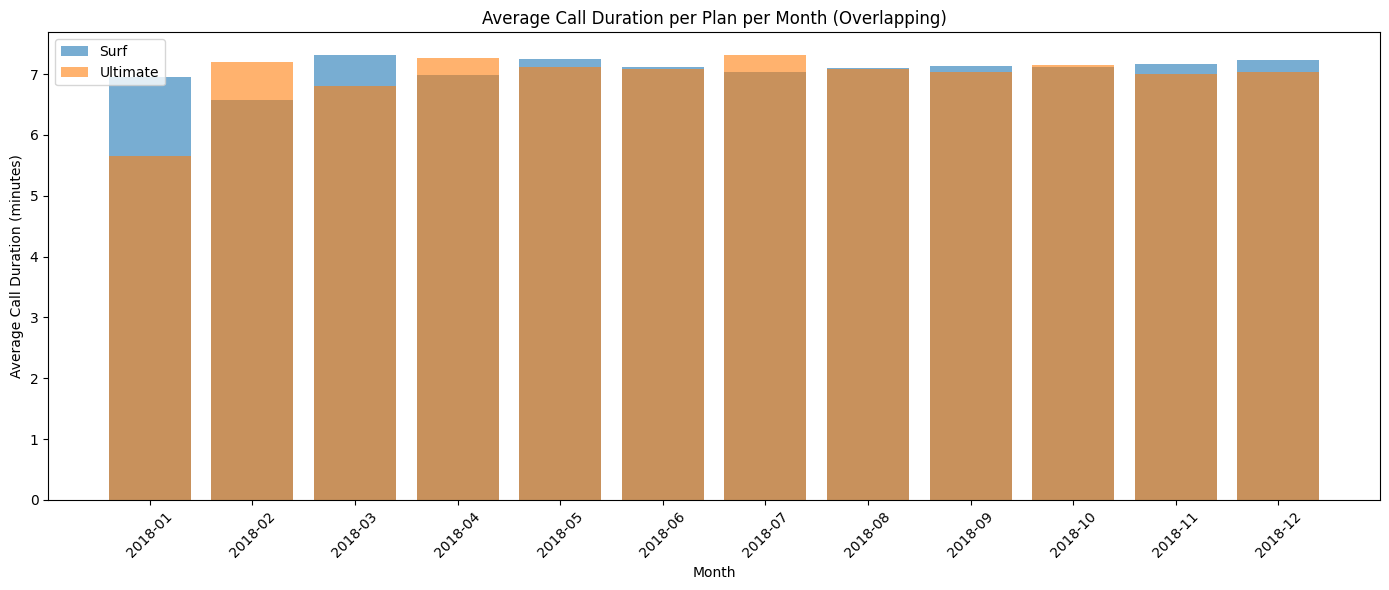

In [32]:
# Comparing the average duration of calls per each plan per each distinct month. Ploting a bar plat to visualize it.

# Create a new column that holds the average call duration
users_usage['avg_call_duration'] = users_usage['minutes_per_month'] / users_usage['calls_per_month']

# Now we need to group by the plan and month in order to calculate the average duration based on the plan
avg_duration_by_plan = (
    users_usage.groupby(['plan', 'month'])['avg_call_duration']
    .mean()
    .reset_index()
)

# Plotting the data
pivot_df = avg_duration_by_plan.pivot(index='month', columns='plan', values='avg_call_duration')
months = pivot_df.index.astype(str)
x = np.arange(len(months))

# Plot
plt.figure(figsize=(14, 6))

plt.bar(x, pivot_df['surf'], label='Surf', alpha=0.6)
plt.bar(x, pivot_df['ultimate'], label='Ultimate', alpha=0.6)

# Labeling the plot
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.title('Average Call Duration per Plan per Month (Overlapping)')
plt.xticks(ticks=x, labels=months, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

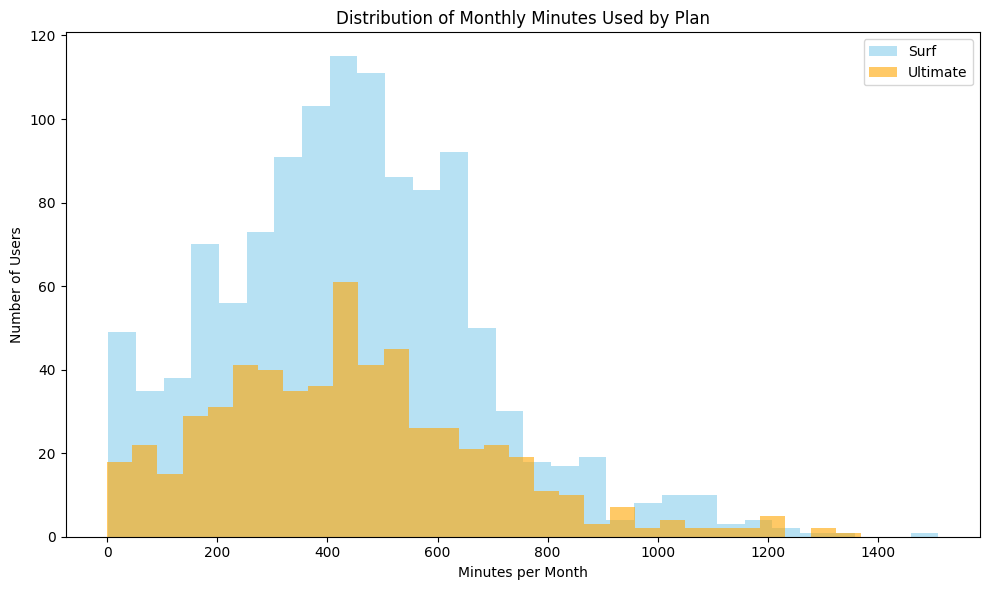

In [33]:
# Comparing the number of minutes users of each plan require each month. Ploting a histogram.

# All we need to do is just plot the information

# Separate them by plan
surf_minutes = users_usage[users_usage['plan'] == 'surf']['minutes_per_month']
ultimate_minutes = users_usage[users_usage['plan'] == 'ultimate']['minutes_per_month']

# Plot
plt.figure(figsize=(10, 6))

plt.hist(surf_minutes, bins=30, alpha=0.6, label='Surf', color='skyblue')
plt.hist(ultimate_minutes, bins=30, alpha=0.6, label='Ultimate', color='orange')

plt.title('Distribution of Monthly Minutes Used by Plan')
plt.xlabel('Minutes per Month')
plt.ylabel('Number of Users')
plt.legend()
plt.tight_layout()
plt.show()

In [34]:
# Calculating the mean and the variance of the monthly call duration
call_stats_by_plan = (
    users_usage
    .groupby('plan')['minutes_per_month']
    .agg(['mean', 'var'])
    .reset_index()
)

# Testing
call_stats_by_plan.head()

,plan,mean,var
0,surf,445.775424,55321.412627
1,ultimate,442.512953,62288.399053


/tmp/ipython-input-1087012647.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([surf_minutes, ultimate_minutes], labels=['Surf', 'Ultimate'])


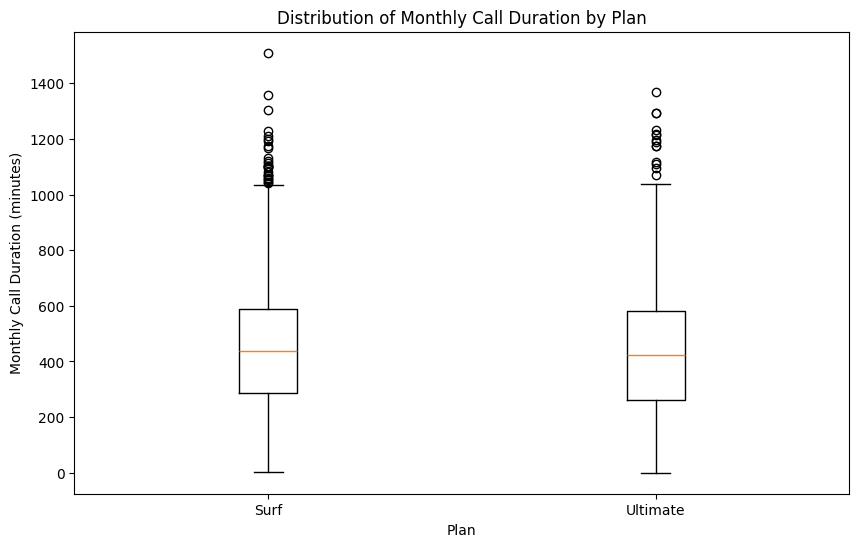

In [35]:
# Ploting a boxplot to visualize the distribution of the monthly call duration
surf_minutes = users_usage[users_usage['plan'] == 'surf']['minutes_per_month']
ultimate_minutes = users_usage[users_usage['plan'] == 'ultimate']['minutes_per_month']

plt.figure(figsize=(10, 6))

plt.boxplot([surf_minutes, ultimate_minutes], labels=['Surf', 'Ultimate'])

plt.title('Distribution of Monthly Call Duration by Plan')
plt.xlabel('Plan')
plt.ylabel('Monthly Call Duration (minutes)')

plt.show()

Calls do not significantly differ between the Surf and Ultimate plans. Users talk for about the same amount of time per month on average, and while Ultimate users show slightly more variation, the overall patterns are very similar.


### Messages

/tmp/ipython-input-111237138.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([surf_msgs, ultimate_msgs], labels=['Surf', 'Ultimate'])


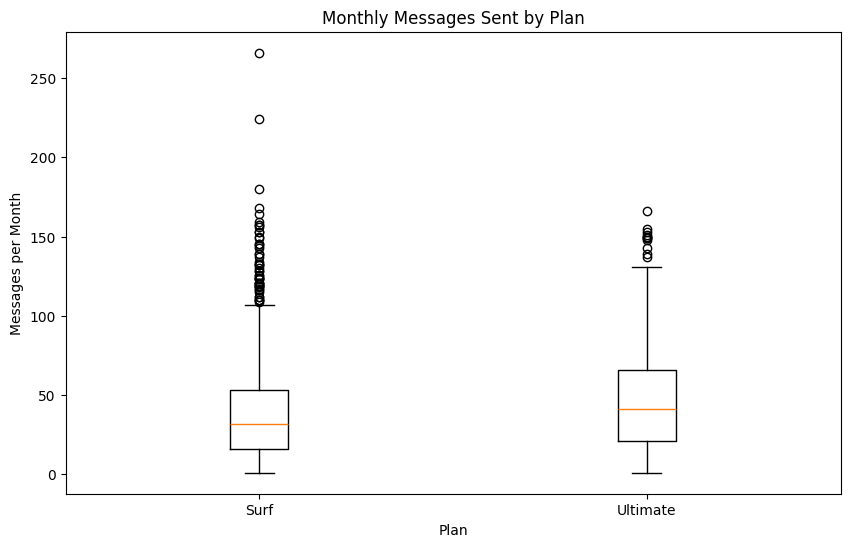

,plan,mean,var
0,surf,39.489831,1044.217878
1,ultimate,46.455959,1084.393818


In [36]:
# Comparing the number of messages users of each plan tend to send each month
message_stats_by_plan = (
    users_usage
    .groupby('plan')['monthly_messages']
    .agg(['mean', 'var'])
    .reset_index()
)

# Plotting the difference
surf_msgs = users_usage[users_usage['plan'] == 'surf']['monthly_messages']
ultimate_msgs = users_usage[users_usage['plan'] == 'ultimate']['monthly_messages']

plt.figure(figsize=(10, 6))
plt.boxplot([surf_msgs, ultimate_msgs], labels=['Surf', 'Ultimate'])
plt.title('Monthly Messages Sent by Plan')
plt.xlabel('Plan')
plt.ylabel('Messages per Month')
plt.show()

# Testing
message_stats_by_plan.head()

Users who are subscribed to the ultimate plan tend to send more messages on average, compared to those on the surf plan. The variance is almost about the same so the messaging habits are the same. Thus, users tend to buy the ultimate plan because they already send a lot of messages within one month.


### Internet

In [37]:
# Comparing the amount of internet traffic consumed by users per plan
internet_stats_by_plan = (
    users_usage
    .groupby('plan')['monthly_mb_used']
    .agg(['mean', 'var'])
    .reset_index()
)

internet_stats_by_plan.head()

,plan,mean,var
0,surf,16629.018297,5.951014e+07
1,ultimate,17250.995838,5.909048e+07


/tmp/ipython-input-1697641142.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([surf_mb, ultimate_mb], labels=['Surf', 'Ultimate'])


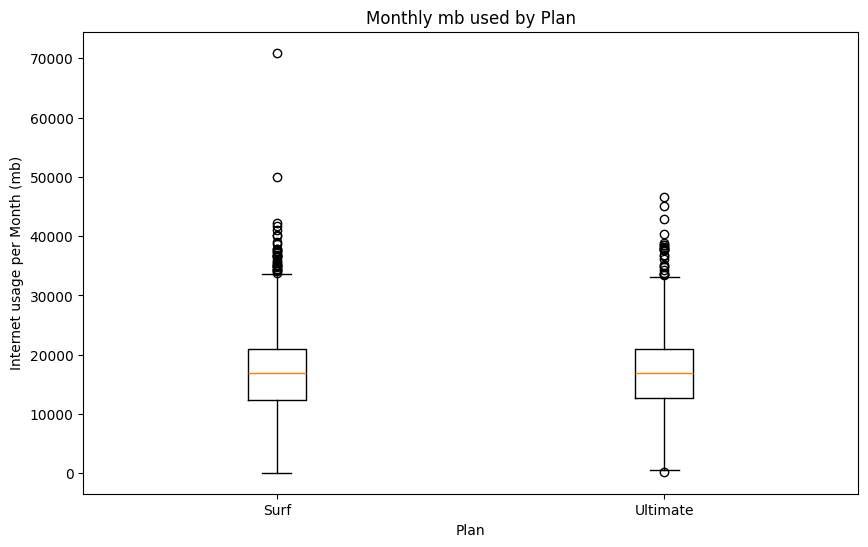

In [38]:
# Plotting the difference
surf_mb = users_usage[users_usage['plan'] == 'surf']['monthly_mb_used']
ultimate_mb = users_usage[users_usage['plan'] == 'ultimate']['monthly_mb_used']

plt.figure(figsize=(10, 6))
plt.boxplot([surf_mb, ultimate_mb], labels=['Surf', 'Ultimate'])
plt.title('Monthly mb used by Plan')
plt.xlabel('Plan')
plt.ylabel('Internet usage per Month (mb)')
plt.show()

Internet usage is close across the Ultimate and Surf plan. Ultimate users use the internet a bit more, but not a by a huge amount. The variance is similar as well, thus we can conclude that the individuals habits affect how much internet they use, not the plan.

## Revenue

In [39]:
# Comparing the revenue between the two plans
revenue_stats_by_plan = (
    users_usage
    .groupby('plan')['monthly_revenue']
    .agg(['mean', 'var'])
    .reset_index()
)

# Testing
revenue_stats_by_plan.head()

,plan,mean,var
0,surf,57.283610,2702.456493
1,ultimate,72.062936,109.884233


/tmp/ipython-input-3219160177.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([surf_mb, ultimate_mb], labels=['Surf', 'Ultimate'])


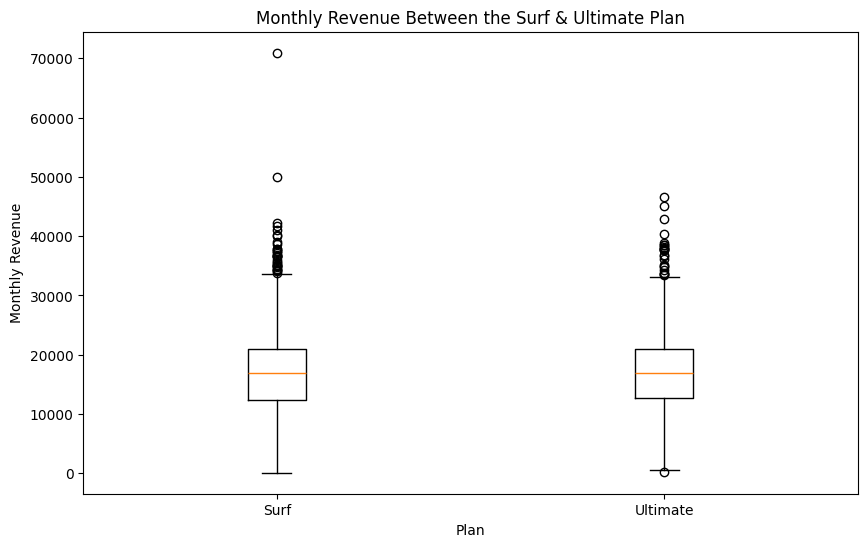

In [40]:
# Plotting the difference
surf_rev = users_usage[users_usage['plan'] == 'surf']['monthly_revenue']
ultimate_rev = users_usage[users_usage['plan'] == 'ultimate']['monthly_revenue']

plt.figure(figsize=(10, 6))
plt.boxplot([surf_mb, ultimate_mb], labels=['Surf', 'Ultimate'])
plt.title('Monthly Revenue Between the Surf & Ultimate Plan')
plt.xlabel('Plan')
plt.ylabel('Monthly Revenue')
plt.show()

Users who subscribe to the Ultimate plan generally bring in more revenue due to the plan costing more, making them more income. On the other hand, users who subscribe to the Surf plan bring is lower revenue, but based on the variance, there are users who pay much more.


## Test statistical hypotheses

In [41]:
# Testing the hypotheses that the average revenue from users of the Ultimate and Surf calling plans differ

# Split the revenue by plan
surf_rev = users_usage[users_usage['plan'] == 'surf']['monthly_revenue']
ultimate_rev = users_usage[users_usage['plan'] == 'ultimate']['monthly_revenue']

# Perform Welch's t-test
t_stat, p_value = st.ttest_ind(surf_rev, ultimate_rev, equal_var=False)

# Output the result
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Testing the hypotheses
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average revenue between the plans.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average revenue between the plans.")

T-statistic: -9.384881058315827
P-value: 2.541856500572636e-20
Reject the null hypothesis: There is a significant difference in average revenue between the plans.


In [42]:
# Testing the hypotheses that the average revenue from users in the NY-NJ area is
# different from that of the users from the other regions

# We need to merge the users dataframe to the users_usage dataframe in order to tget the users city
users_usage = users_usage.merge(
    users[['user_id', 'metro_area']],
    on='user_id',
    how='left'
)

# Splitting the revenue by the city's
ny_nj_rev = users_usage[users_usage['metro_area'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']
other_rev = users_usage[users_usage['metro_area'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']

# Welch’s t-test
t_stat, p_value = st.ttest_ind(ny_nj_rev, other_rev, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Revenue differs between NY-NJ and other regions.")
else:
    print("Fail to reject the null hypothesis: No significant revenue difference.")


T-statistic: -3.0489192147468462
P-value: 0.002436272907975214
Reject the null hypothesis: Revenue differs between NY-NJ and other regions.


## General conclusion

- Extracted monthly data from daily logs using the .dt.to_period('M') to analyze behavior at a monthly level.
- Grouped by user_id and month to calculate:
  - Calls
  - Minutes
  - Messages
  - mb used
- Used inner joins to combine the neccesary data.
- Merged users and plans data using a left join to get all users as well as attaching the plan details to those users.
- Subtracted plan-included limit values from the actual users usage in order to find the average revenue.
- Users on both plans had similar average montly call minutes, but the Ultimate users talked a bit more.
- Ultimate users also sent more messages compared to the Surf users.
- The used data was a bit higher for the ultimate users, but the variance wasn't that much of a difference, thus we can conclude that the plans didn't have an effect on their internet usage.
- Surf plan users has lower average monthly revenue, but a higher variance due to the overcharge rate.
- Ultimate plan users generated more stable and higher average revenue due to their higher charge.
    - We can conclude that the surf plan is unpredictable, but can be potentially more profitable, while the ultimate offers predictable revenue.
- Plan revenue differences:
    - Welch's t-test showed a difference between the surf and ultimate average revenue.
    - We can concluded that revenue does differ between the two plans.
- NY-NJ vs. Other Regions:
    - Hypothesis test showed that the revenue does differ from the other regions.